In [28]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

In [29]:
style.use('fivethirtyeight')

In [30]:
# xs = [1,2,3,4,5,6]
# ys = [5,3,6,5,6,7]

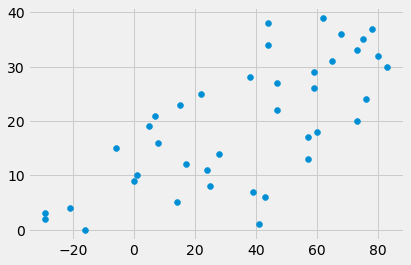

In [31]:

plt.scatter(xs, ys)
plt.show()

In [32]:
# xs = np.array([1,2,3,4,5,6], dtype=np.float64)
# ys = np.array([5,3,6,5,6,7], dtype=np.float64)

def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        
        if correlation and correlation == 'pos':
            val = val + step
        elif correlation and correlation == 'neg':
            val = val - step
    xs = [i for i in range(len(ys))]
    return np.array(ys, dtype=np.float64), np.array(xs, dtype=np.float64)

In [33]:
def best_fit_slope_and_intercept(xs, ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) / ((mean(xs)**2) - mean(xs**2)))
    b = mean(ys) - m*(mean(xs))
    return m,b

xs, ys = create_dataset(40, 40, 2, correlation='pos')


m,b = best_fit_slope_and_intercept(xs, ys)
print(m, b)


def squared_error(ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return (1-(squared_error_regr/squared_error_y_mean))


0.23441175766951894 10.33450027512181


In [34]:
regression_line = [(m*x)+b for x in xs]

In [35]:
regression_line

[1.426853483680091,
 11.506559063469405,
 6.818323910079026,
 16.429205974529303,
 12.913029609486518,
 21.117441127919683,
 12.913029609486518,
 14.085088397834113,
 20.179794097241604,
 13.381853124825556,
 16.194794216859783,
 22.055088158597755,
 6.818323910079026,
 14.55391191317315,
 19.710970581902565,
 18.773323551224493,
 23.227146946945354,
 9.162441486774215,
 12.678617851816998,
 11.740970821138923,
 11.272147305799885,
 28.384205615674766,
 19.710970581902565,
 12.44420609414748,
 23.69597046228439,
 13.381853124825556,
 30.259499677030917,
 27.915382100335734,
 15.257147186181708,
 23.69597046228439,
 20.883029370250163,
 33.072440769065146,
 33.072440769065146,
 26.977735069657655,
 22.055088158597755,
 35.650970103429856,
 32.36920549605659,
 24.164793977623425,
 34.010087799743225,
 26.04008803897958]

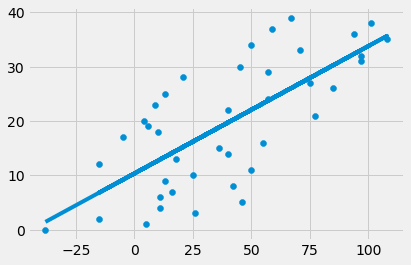

In [36]:
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()

In [37]:
predict_x = 8
predict_y = (m*predict_x + b)

r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.5171132170127961


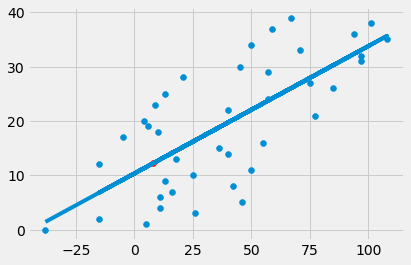

In [38]:
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, color='r')
plt.plot(xs, regression_line)
plt.show()

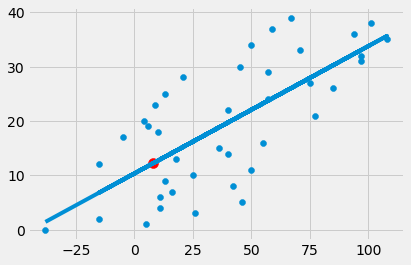

In [39]:

plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, s=100, color='r')#s=100 to see the predicted point properly
plt.plot(xs, regression_line)
plt.show()
